## Transfer Learning VGG 16 and VGG 19 using Keras

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [8]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)






94765736/94765736 [==============================] - 19s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [11]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\aarun\AppData\Local\Temp\ipykernel_28108\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50


2/2 [==============================] - 41s 22s/step - loss: 8.5153 - accuracy: 0.2969 - val_loss: 3.8106 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 23s 17s/step - loss: 5.4451 - accuracy: 0.2812 - val_loss: 12.1363 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 24s 16s/step - loss: 8.1349 - accuracy: 0.3906 - val_loss: 13.7364 - val_accuracy: 0.1724
Epoch 4/50
2/2 [==============================] - 23s 16s/step - loss: 8.0418 - accuracy: 0.4219 - val_loss: 10.4952 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 25s 18s/step - loss: 5.5220 - accuracy: 0.5781 - val_loss: 5.6288 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 23s 16s/step - loss: 2.1955 - accuracy: 0.5312 - val_loss: 2.5183 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 23s 16s/step - loss: 3.2552 - accuracy: 0.4062 - val_loss: 3.8710 - val_accuracy: 0.5172
Epoch 8/50
2/2 [======

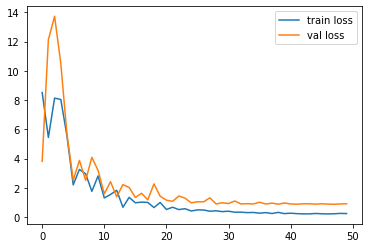

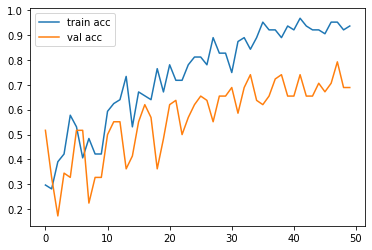

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\aarun\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:

y_pred = model.predict(test_set)


2/2 [==============================] - 15s 4s/step


In [23]:
y_pred

array([[2.5065163e-02, 2.6634973e-03, 9.7227138e-01],
       [4.1235223e-02, 7.3221058e-01, 2.2655417e-01],
       [1.2526190e-02, 9.8661000e-01, 8.6388225e-04],
       [6.3494116e-02, 3.5602209e-01, 5.8048385e-01],
       [2.7562339e-02, 2.5282308e-01, 7.1961462e-01],
       [4.9693733e-03, 2.8593287e-02, 9.6643728e-01],
       [2.3768906e-02, 7.4602830e-01, 2.3020273e-01],
       [9.6892142e-01, 1.6088594e-02, 1.4989948e-02],
       [4.0991999e-02, 2.5197370e-03, 9.5648819e-01],
       [9.2865288e-01, 3.2317150e-02, 3.9029926e-02],
       [7.6611370e-01, 1.7420003e-01, 5.9686221e-02],
       [3.2111185e-03, 9.2524242e-01, 7.1546465e-02],
       [1.4688893e-02, 9.3759423e-01, 4.7716852e-02],
       [1.1195001e-01, 7.9150945e-02, 8.0889910e-01],
       [1.9518109e-02, 5.0711948e-01, 4.7336242e-01],
       [5.6865460e-01, 1.7543530e-01, 2.5591004e-01],
       [7.1830787e-02, 1.0209382e-02, 9.1795975e-01],
       [8.3954871e-02, 3.5536537e-01, 5.6067985e-01],
       [8.7915099e-01, 1.178

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [29]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.00680706, 0.01585268, 0.9773402 ]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 244ms/step


In [36]:
a==1

array([False])